In [ ]:
pip install squarify

In [ ]:
import numpy as np
import pandas as pd

# 시각화를 위한 패키지
import warnings
warnings.filterwarnings("ignore")        
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
import seaborn as sns
import squarify
plt.rcParams['figure.dpi'] = 200

In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [ ]:
x = ['<1', '1', '2', '3', '4','5',
     '6', '7', '8', '9', '10', '11',
     '12', '13', '14', '15', '16', '17',
     '18','19', '20', '>20']

last = []
for i in x:
    last.append(len(train[(train['target']==1)&(train["experience"]==i)])/train["experience"].value_counts()[i])

In [ ]:
def experience(x):
    if x=='<1'      :   return 0
    if x=='1'       :   return 1 
    if x=='2'       :   return 2 
    if x=='3'       :   return 3 
    if x=='4'       :   return 4 
    if x=='5'       :   return 5
    if x=='6'       :   return 6
    if x=='7'       :   return 7
    if x=='8'       :   return 8 
    if x=='9'       :   return 9 
    if x=='10'      :   return 10 
    if x=='11'      :   return 11
    if x=='12'      :   return 12
    if x=='13'      :   return 13 
    if x=='14'      :   return 14 
    if x=='15'      :   return 15 
    if x=='16'      :   return 16
    if x=='17'      :   return 17
    if x=='18'      :   return 18
    if x=='19'      :   return 19 
    if x=='20'      :   return 20 
    if x=='>20'     :   return 21


def last_job(x):
    if x=='never'        :   return 0
    if x=='1'            :   return 1 
    if x=='2'            :   return 2 
    if x=='3'            :   return 3 
    if x=='4'            :   return 4 
    if x=='>4'           :   return 5 

train["major_discipline"] = np.where(train["education_level"]=="High School", "High School", train["major_discipline"])
train["major_discipline"] = np.where(train["education_level"]=="Primary School", "Primary School", train["major_discipline"])

In [ ]:
train['last_new_job'] = train['last_new_job'].apply(lambda x: 'Never' if x == 'never' else x) #just reads nicer
train['enrolled_university'][train['enrolled_university'] == 'no_enrollment'] = 'No Enrollment' #just reads nicer
train['company_size'] = train['company_size'].apply(lambda x: '10-49' if x == '10/49' else x) #diff replacement method

In [ ]:
train['company_size'].fillna('Unknown',inplace=True)
train['company_type'].fillna('Unknown',inplace=True)
train['major_discipline'].fillna('Unknown',inplace=True)
train['gender'].fillna('Unknown',inplace=True)

In [ ]:
train.isnull().sum()

id                          0
city                        0
city_development_index      0
gender                      0
relevent_experience         0
enrolled_university       351
education_level           414
major_discipline            0
experience                 53
company_size                0
company_type                0
last_new_job              384
training_hours              0
target                      0
dtype: int64

In [ ]:
train.dropna(inplace=True)
train['experience'] = train['experience'].apply(experience)

In [ ]:
ed_order = ['Primary School','High School','Graduate','Masters','Phd']
enroll_order = ['No Enrollment','Part time course','Full time course']
disc_order = ['STEM','Unknown','Humanities','Other','Business Degree','Arts','No Major','Primary School','High School']
exp_yrs_order = ['<1','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','>20']
exp_yrs_order_2 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]
size_order = ['Unknown','<10', '10-49', '50-99', '100-500', '500-999', '1000-4999', '5000-9999', '10000+']
job_order = ['Never', '1', '2', '3', '4', '>4']
exp_order =['No relevant experience','Has relevant experience']
gender_order = ['Male','Female','Other','Unknown']
company_order = ['Pvt Ltd','Unknown','Funded Startup','Public Sector','Early Stage Startup','NGO','Other']

train_df = train

In [ ]:
train.head()

,id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,4064,city_160,0.920,Unknown,Has relevent experience,No Enrollment,Graduate,STEM,18,Unknown,Unknown,1,198,1
1,33238,city_90,0.698,Male,Has relevent experience,No Enrollment,Graduate,STEM,7,Unknown,Unknown,1,149,0
2,20922,city_114,0.926,Unknown,No relevent experience,No Enrollment,High School,High School,3,Unknown,Unknown,Never,9,0
3,2290,city_114,0.926,Male,Has relevent experience,No Enrollment,Masters,STEM,15,10000+,Pvt Ltd,2,5,0
5,26214,city_173,0.878,Male,No relevent experience,Full time course,Masters,Humanities,9,100-500,Public Sector,2,56,0


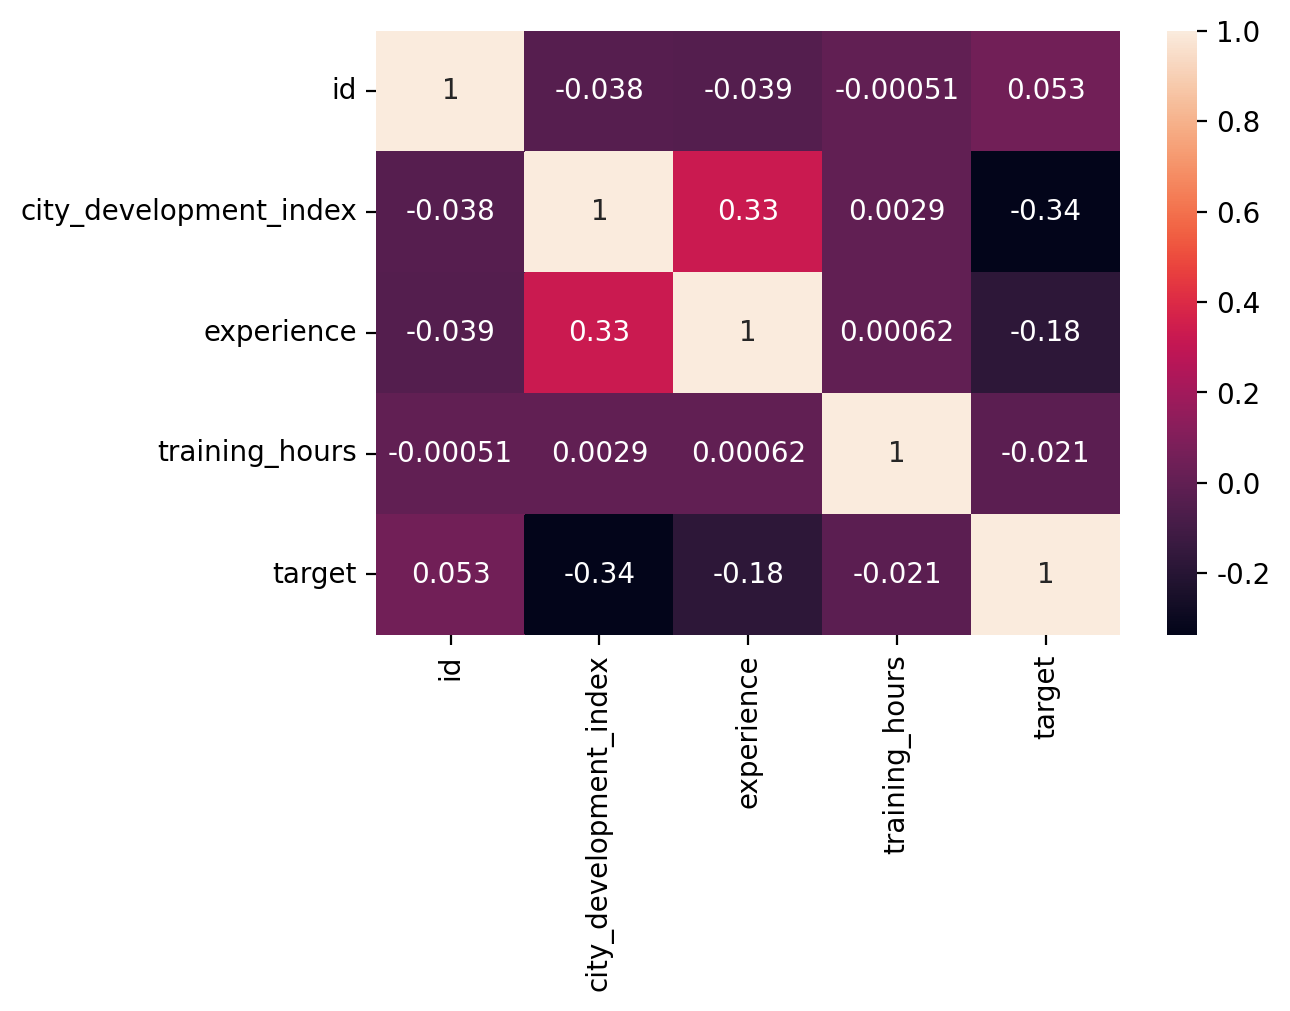

In [ ]:
sns.heatmap(train.corr(), annot=True)

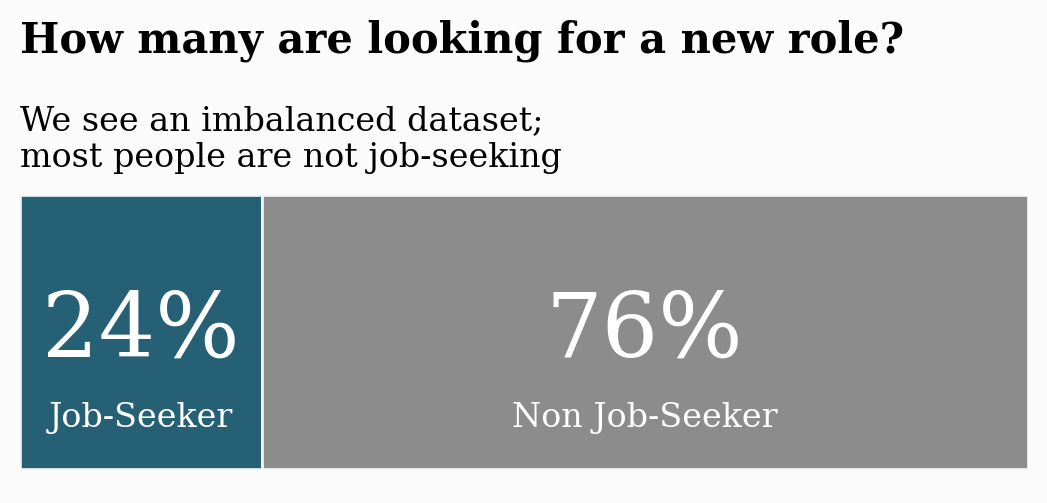

In [ ]:
x=train_df.groupby(['target'])['target'].count()
y=len(train_df)
r=((x/y)).round(2)
ratio = pd.DataFrame(r).T

fig, ax = plt.subplots(1, 1, figsize=(6.5, 2))
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) # fig 배경색 
ax.set_facecolor(background_color) # ax 배경색


ax.barh(ratio.index, ratio[1.0], color='#0e4f66', alpha=0.9, ec=background_color, label='Job-Seeker')
ax.barh(ratio.index, ratio[0.0], left=ratio[1.0], color='gray', alpha=0.9,ec=background_color, label='Non Job-Seeker')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
ax.legend().set_visible(False)

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

ax.annotate(f"{int(ratio[1.0]['target']*100)}%", xy=(ratio[1.0]['target']/2, 'target'),va = 'center', ha='center',fontsize=32, fontweight='light', fontfamily='serif',color='white')
ax.annotate("Job-Seeker", xy=(ratio[1.0]['target']/2, -0.25),va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',color='white')

ax.annotate(f"{int(ratio[0.0]['target']*100)}%", xy=(ratio[1.0]['target']+ratio[0.0]['target']/2, 'target'),va = 'center', ha='center',fontsize=32, fontweight='light', fontfamily='serif',color='white')
ax.annotate("Non Job-Seeker", xy=(ratio[1.0]['target']+ratio[0.0]['target']/2, -0.25),va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',color='white')

fig.text(0.125,1.2,'How many are looking for a new role?', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.915,'We see an imbalanced dataset;\nmost people are not job-seeking',fontfamily='serif',fontsize=12)  

plt.show()

Text(0.77, 0.159, "\n\n- When classified by the presence or absence \nof relevant experience, the relevant experience\nwere about 2.5 times more people with no relevent experience\npeople.\n\n\n\n- Considering the proportion of job seekers according to whether \nthey have related experience, the probability of finding another job \nis about 20% for those with related experience, and about \n34% for those without related experience\n\n\n\n- From the perspective of companies, in order to prevent \nthe outflow of manpower selecting people who have relevent \nexperience than those who have no relevent experience.\n\n\n\n\n\n\n\n\n\n\n\n\n\n- What is more interesting though is the City Development \nIndex(CDI) chart. There we see that there are two peaks for \njob-seekers. The peaks are at high and low CDI scores. \n\n\n\n- However, in proportion, the lower the CDI, the more people \nlooking for other jobs, and the higher the CDI, the fewer \npeople looking for other jobs.\n\n\n\n- From the

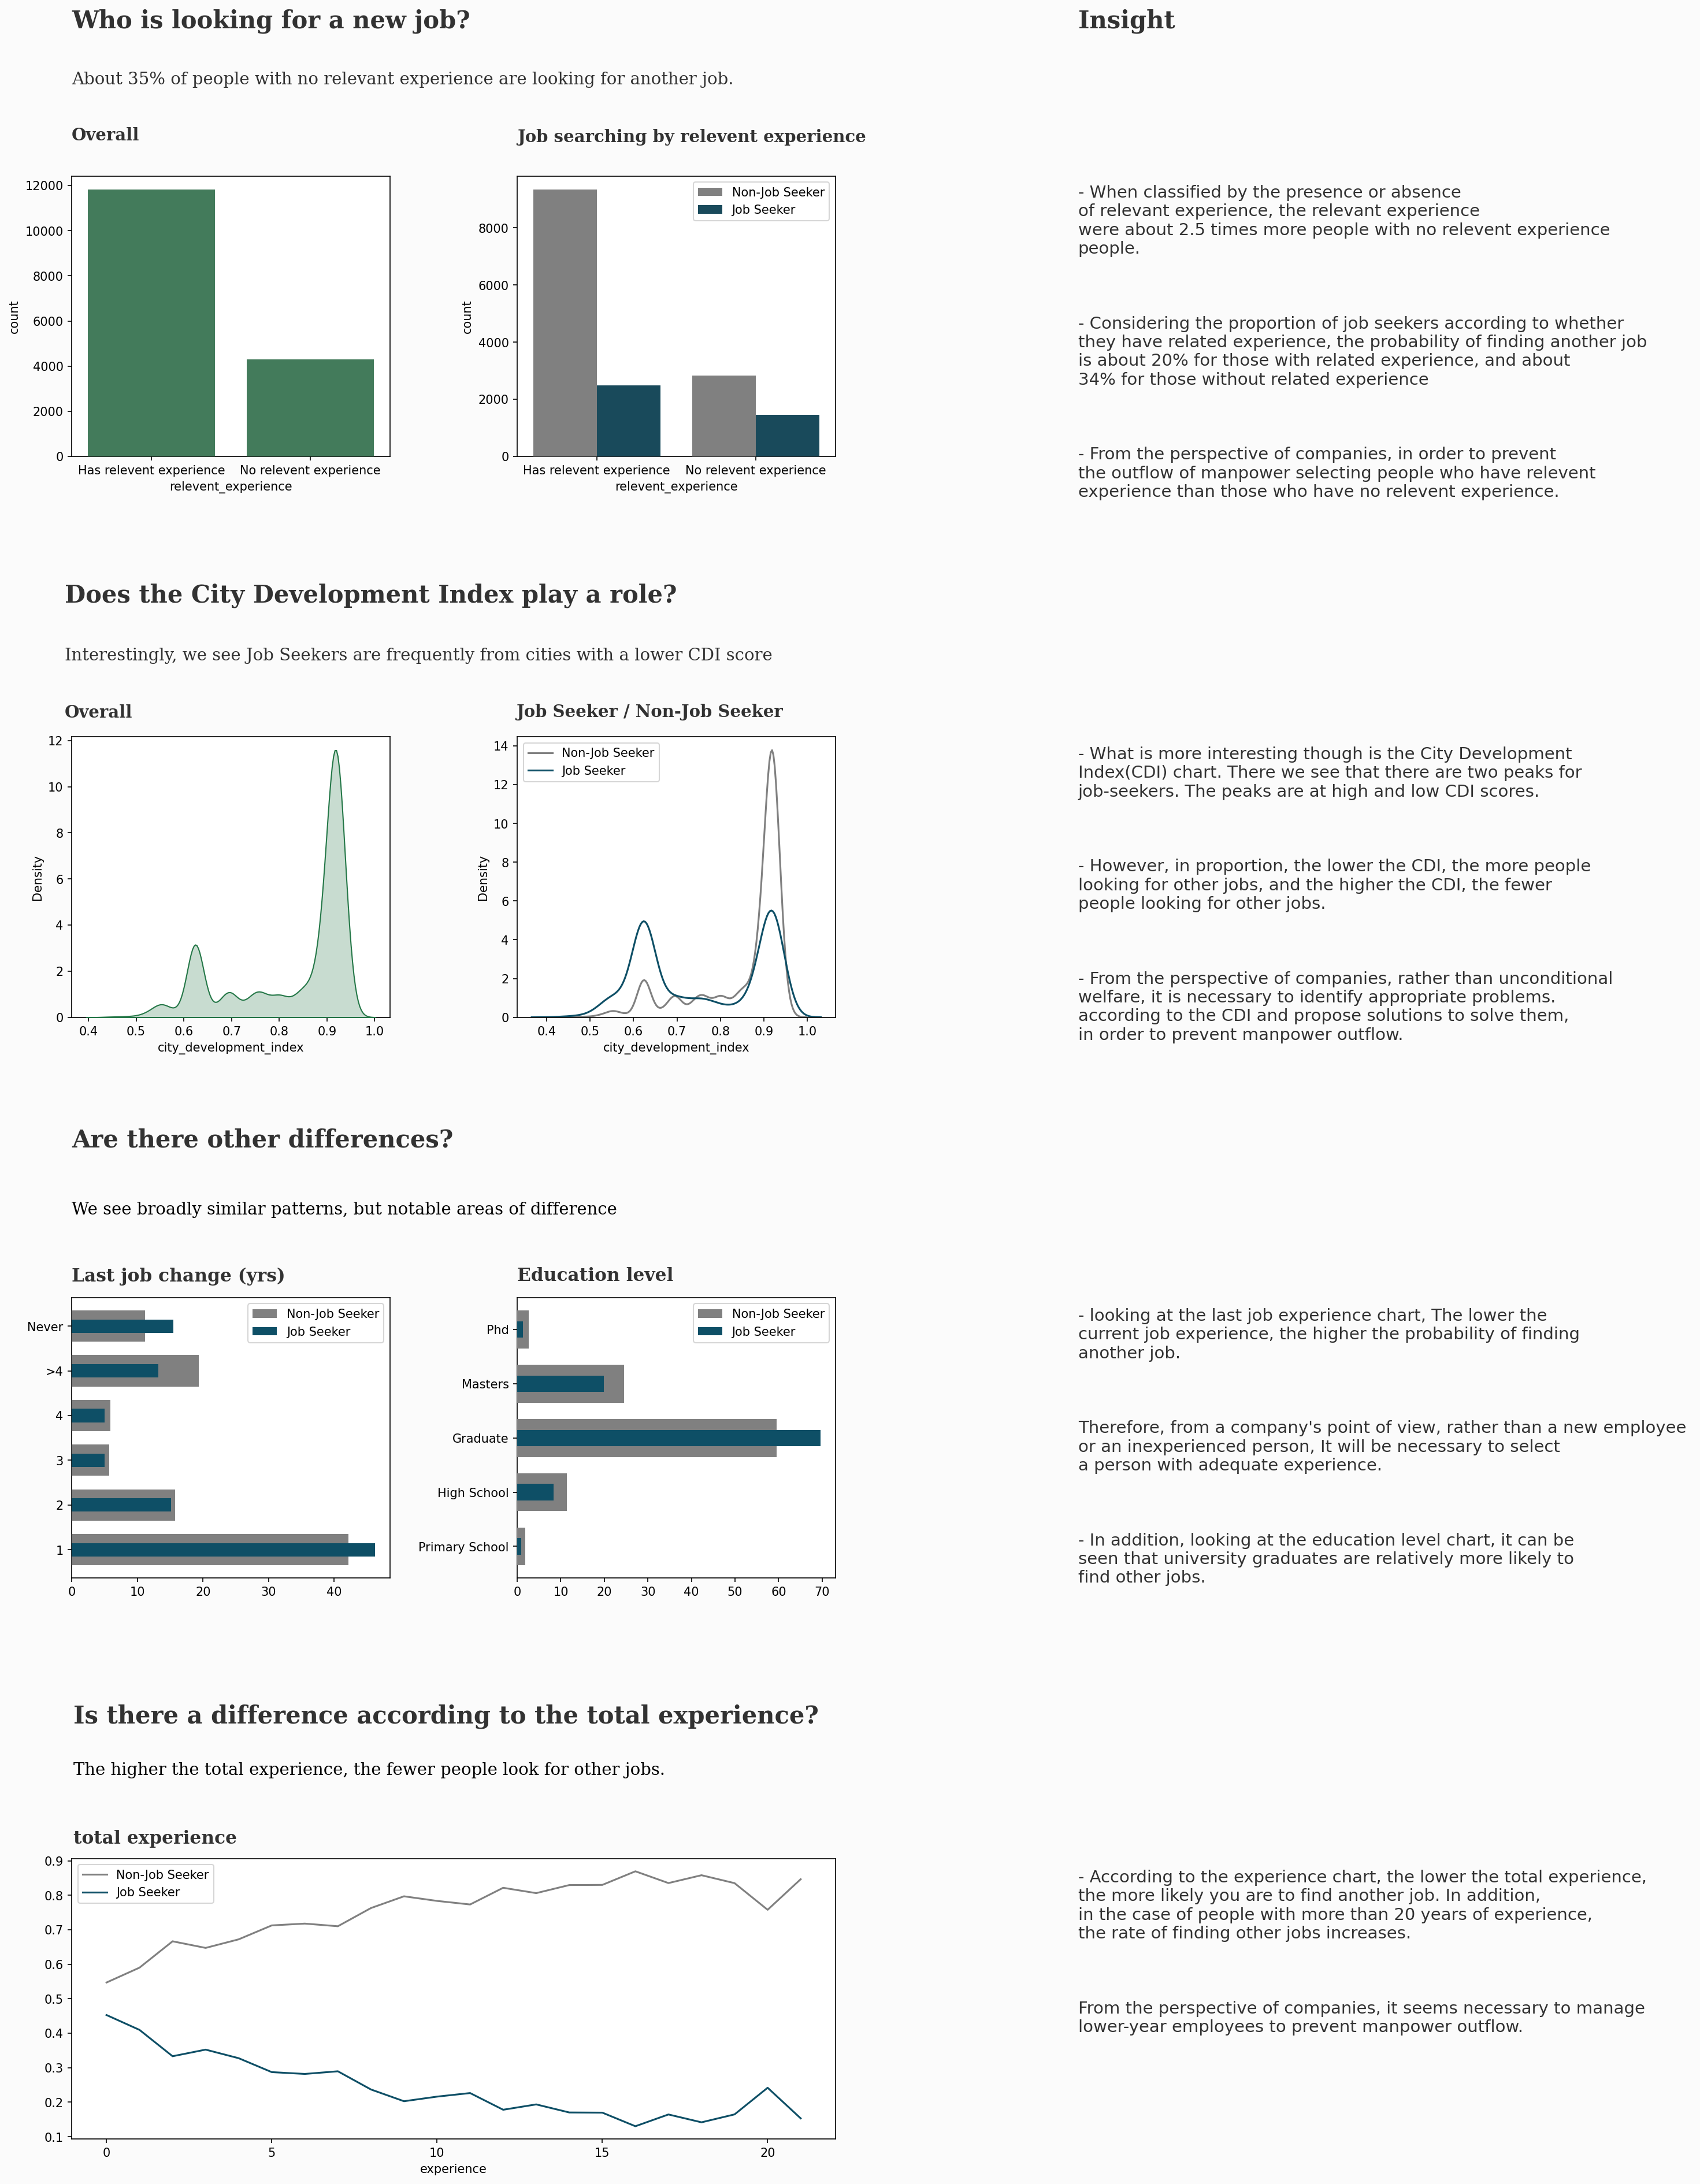

In [ ]:
color_palette = ['gray', '#0e4f66']

train['count'] = 1
job_hunt_only = train[train['target']==1]
no_job_hunt_only = train[train['target']==0]

rl_job_seek = job_hunt_only.groupby(['target','relevent_experience'])['count'].sum().unstack().T
rl_job_seek.columns = ['count']
rl_job_seek['percentage'] = rl_job_seek['count'].apply(lambda x: x/sum(rl_job_seek['count'])) * 100

job_hunt_only.groupby(['target','last_new_job'])['count'].sum().unstack()
notseek_job_change = no_job_hunt_only.groupby(['target','last_new_job'])['count'].sum().unstack().T
seek_job_change = job_hunt_only.groupby(['target','last_new_job'])['count'].sum().unstack().T

notseek_job_change.columns = ['count']
seek_job_change.columns = ['count']

notseek_job_change["percentage"] = notseek_job_change["count"].apply(lambda x: x/sum(notseek_job_change["count"])) *100
seek_job_change["percentage"] = seek_job_change["count"].apply(lambda x: x/sum(seek_job_change["count"])) *100


ed_notseek_job_change = no_job_hunt_only.groupby(['target','education_level'])['count'].sum().unstack().T.loc[ed_order]
ed_seek_job_change = job_hunt_only.groupby(['target','education_level'])['count'].sum().unstack().T.loc[ed_order]

ed_notseek_job_change.columns = ['count']
ed_seek_job_change.columns = ['count']

ed_notseek_job_change["percentage"] = ed_notseek_job_change["count"].apply(lambda x: x/sum(ed_notseek_job_change["count"])) *100
ed_seek_job_change["percentage"] = ed_seek_job_change["count"].apply(lambda x: x/sum(ed_seek_job_change["count"])) *100

fig = plt.figure(figsize=(18, 30), dpi=150)
fig.patch.set_facecolor(background_color)
gs = fig.add_gridspec(4, 3)
gs.update(wspace=0.4, hspace=1)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[2, 0])
ax5 = fig.add_subplot(gs[2, 1])
ax6 = fig.add_subplot(gs[3, 0:2])
# ax7 = fig.text(gs[0, 2])

plt.subplots_adjust(hspace=5)

ax0.text(-0.5, 19000, 'Who is looking for a new job?', fontsize=20, fontweight='bold', 
         fontfamily='serif', color="#323232")
ax0.text(-0.5, 16500, 'About 35% of people with no relevant experience are looking for another job.', 
         fontsize=14, fontweight='light', fontfamily='serif', color="#323232")
ax0.text(-0.5, 14000, 'Overall', fontsize=14, fontweight='bold', 
         fontfamily='serif', color="#323232")
sns.countplot(x=train_df["relevent_experience"], color="#247747", 
              ax=ax0, zorder=3, alpha=0.9)

# gender

ax1.text(-0.5, 11000, 'Job searching by relevent experience', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
sns.countplot(x="relevent_experience", hue="target", data=train_df, palette=color_palette, ax=ax1, zorder=3)
legend_labels, _= ax1.get_legend_handles_labels()
ax1.legend(legend_labels, ["Non-Job Seeker", "Job Seeker"])

# city_development_index

ax2.text(0.35, 18, 'Does the City Development Index play a role?', 
         fontsize=20, fontweight='bold', fontfamily='serif', color="#323232")
ax2.text(0.35, 15.5, 'Interestingly, we see Job Seekers are frequently from cities with a lower CDI score', 
         fontsize=14, fontweight='light', fontfamily='serif', color="#323232")
ax2.text(0.35, 13, 'Overall', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
sns.kdeplot(train_df["city_development_index"], color="#247747", shade=True, ax=ax2, zorder=3, )

ax3.text(0.33, 15.5, 'Job Seeker / Non-Job Seeker', fontsize=14, fontweight='bold', 
         fontfamily='serif', color="#323232")
sns.kdeplot(train_df.loc[(train_df["target"]==0), "city_development_index"], 
            color="gray", label="Not Survived", ax=ax3)
sns.kdeplot(train_df.loc[(train_df["target"]==1), "city_development_index"], 
            color="#0e4f66", label="Survived", ax=ax3)
legend_labels, _= ax3.get_legend_handles_labels()
ax3.legend(legend_labels, ["Non-Job Seeker", "Job Seeker"])

ax4.barh(notseek_job_change.index, notseek_job_change['percentage'], 
         color="gray", zorder=3, height=0.7)
ax4.barh(seek_job_change.index, seek_job_change['percentage'], 
         color="#0e4f66", zorder=3, height=0.3)
legend_labels, _= ax4.get_legend_handles_labels()
ax4.legend(["Non-Job Seeker", "Job Seeker"])
ax4.xaxis.set_major_locator(mtick.MultipleLocator(10))
ax4.text(0, 6, 'Last job change (yrs)',fontsize=15, 
         fontweight='bold', fontfamily='serif',color='#323232')
ax4.text(0, 9, 'Are there other differences?', 
         fontsize=20, fontweight='bold', fontfamily='serif',color='#323232')
ax4.text(0, 7.5, 
         'We see broadly similar patterns, but notable areas of difference', 
         fontsize=14, fontweight='light', fontfamily='serif')


ax5.barh(ed_notseek_job_change.index, ed_notseek_job_change['percentage'], 
         color="gray", zorder=3, height=0.7)
ax5.barh(ed_seek_job_change.index, ed_seek_job_change['percentage'], 
         color="#0e4f66", zorder=3, height=0.3)
ax5.legend(["Non-Job Seeker", "Job Seeker"])
ax5.xaxis.set_major_locator(mtick.MultipleLocator(10))
ax5.text(0, 4.9, 'Education level', fontsize=15, fontweight='bold', 
         fontfamily='serif',color='#323232')

ex_list = ['<1', '1', '2', '3', '4','5',
     '6', '7', '8', '9', '10', '11',
     '12', '13', '14', '15', '16', '17',
     '18','19', '20', '>20']

pd.crosstab(train['experience'], train['target'], normalize='index').plot(ax=ax6, color=['gray', "#0e4f66"])
ax6.legend(["Non-Job Seeker", "Job Seeker"])
ax6.text(-1, 0.95, 'total experience',fontsize=15, 
         fontweight='bold', fontfamily='serif',color='#323232')
ax6.text(-1, 1.3, 'Is there a difference according to the total experience?', 
         fontsize=20, fontweight='bold', fontfamily='serif',color='#323232')
ax6.text(-1, 1.15, 
         'The higher the total experience, the fewer people look for other jobs.', 
         fontsize=14, fontweight='light', fontfamily='serif')

fig.text(0.77, 0.937
         , 'Insight', fontsize=20, fontweight='bold', fontfamily='serif',color='#323232')


fig.text(0.77, 0.159, '''

- When classified by the presence or absence 
of relevant experience, the relevant experience
were about 2.5 times more people with no relevent experience
people.



- Considering the proportion of job seekers according to whether 
they have related experience, the probability of finding another job 
is about 20% for those with related experience, and about 
34% for those without related experience



- From the perspective of companies, in order to prevent 
the outflow of manpower selecting people who have relevent 
experience than those who have no relevent experience.













- What is more interesting though is the City Development 
Index(CDI) chart. There we see that there are two peaks for 
job-seekers. The peaks are at high and low CDI scores. 



- However, in proportion, the lower the CDI, the more people 
looking for other jobs, and the higher the CDI, the fewer 
people looking for other jobs.



- From the perspective of companies, rather than unconditional 
welfare, it is necessary to identify appropriate problems. 
according to the CDI and propose solutions to solve them, 
in order to prevent manpower outflow.














- looking at the last job experience chart, The lower the 
current job experience, the higher the probability of finding 
another job.



Therefore, from a company's point of view, rather than a new employee 
or an inexperienced person, It will be necessary to select 
a person with adequate experience.



- In addition, looking at the education level chart, it can be 
seen that university graduates are relatively more likely to 
find other jobs.















- According to the experience chart, the lower the total experience, 
the more likely you are to find another job. In addition, 
in the case of people with more than 20 years of experience, 
the rate of finding other jobs increases.



From the perspective of companies, it seems necessary to manage 
lower-year employees to prevent manpower outflow.
'''
         , fontsize=14, fontweight='light', fontfamily='Malgun Gothic', color='#323232')
